In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# reading Titanic train data.csv
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print("Shape:\n",df.shape)
print("Info:\n",df.info())

Shape:
 (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Info:
 None


* From the above info we can see that age,cabin & embarked are having missing values
* More than 50% of the cabin column data is missing, hence dropping the cabin column

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
df = df.dropna(subset = ['Age','Embarked'])
print(df.shape)
df.head()

(712, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
# data statistics
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [7]:
df.groupby('Survived')[['Age']].mean()

,Age
Survived,
0,30.626179
1,28.193299


In [8]:
print(pd.crosstab(df['Survived'],df['Sex']))
print('\n\n')
print(pd.crosstab(df['Survived'],[df['Sex'],df['Pclass']]))

Sex       female  male
Survived              
0             64   360
1            195    93



Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  55   61  84  215
1            80  68  47   40  15   38


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

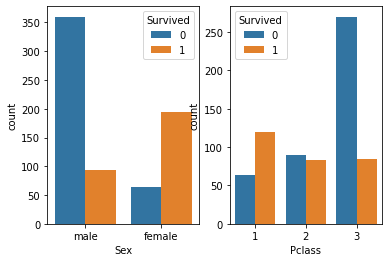

In [10]:
plt.subplot(1,2,1)
sns.countplot(df['Sex'],hue = df['Survived'])
plt.subplot(1,2,2)
sns.countplot(df['Pclass'],hue = df['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

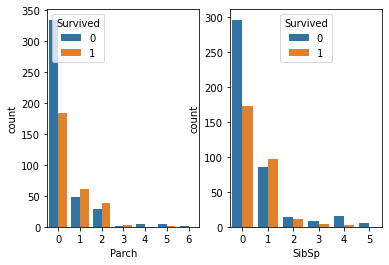

In [11]:
plt.subplot(1,2,1)
sns.countplot(df['Parch'],hue = df['Survived'])
plt.subplot(1,2,2)
sns.countplot(df['SibSp'],hue = df['Survived'])

Embarked   C   Q    S
Survived             
0         51  20  353
1         79   8  201


<AxesSubplot:xlabel='Embarked', ylabel='count'>

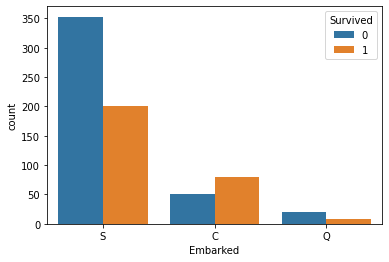

In [12]:
print(pd.crosstab(df['Survived'],df['Embarked']))
sns.countplot(df['Embarked'],hue=df['Survived'])

Pclass      1   2    3
Survived              
0          64  90  270
1         120  83   85


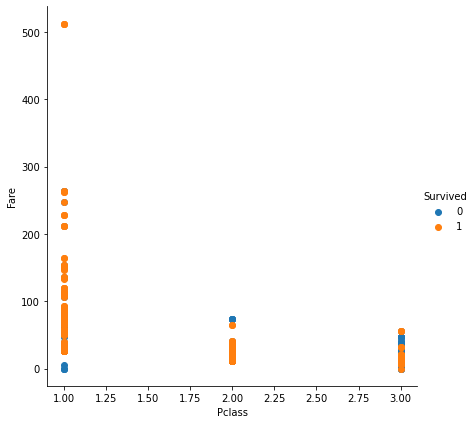

In [13]:
print(pd.crosstab(df['Survived'],df['Pclass']))
sns.FacetGrid(df,hue='Survived',size=6).map(plt.scatter,'Pclass','Fare').add_legend()

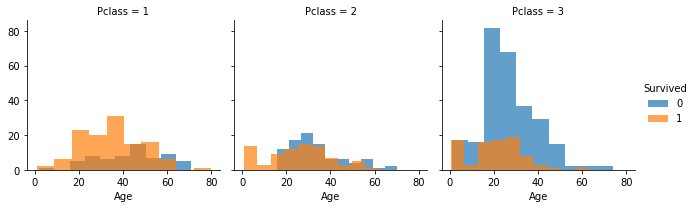

In [14]:
sns.FacetGrid(df, col = 'Pclass', hue = 'Survived').map(plt.hist, 'Age', alpha = 0.7).add_legend()

In [15]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [16]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['Sex'] = enc.fit_transform(df['Sex'].values)
df['Embarked'] = enc.fit_transform(df['Embarked'].values)

In [17]:
print(df['Sex'].unique())
print(df['Embarked'].unique())
df.head()

[1 0]
[2 0 1]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [18]:
X = df.iloc[:,1:]
Y = df['Survived']

In [19]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
tdf = test.drop(['Cabin','PassengerId','Name','Ticket'],axis = 1)

In [20]:
tdf['Age'].fillna(round(tdf['Age'].mean()),inplace=True)
tdf['Fare'].fillna(round(tdf['Fare'].mean()),inplace=True)

In [21]:
enc_ = LabelEncoder()
tdf['Sex'] = enc_.fit_transform(tdf['Sex'].values)
tdf['Embarked'] = enc_.fit_transform(tdf['Embarked'].values)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
tdf = sc.transform(tdf)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X,Y)

KNeighborsClassifier()

In [24]:
train_pred = classifier.predict(X)
test_pred = classifier.predict(tdf)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix

print('Confusion_matrix:\n',confusion_matrix(Y,train_pred))
print('\n')
print("Accuracy: ",accuracy_score(Y,train_pred))

Confusion_matrix:
 [[386  38]
 [ 58 230]]


Accuracy:  0.8651685393258427


In [26]:
test['Survived']= test_pred

In [27]:
test[['PassengerId','Survived']].to_csv('result.csv',index=False)
